# **Private and Public universities acceptance dataset**
Vamos supor que o governo dos EUA quer agrupar as universidades americanas para a realização de melhores políticas publicas de incentivo ao desenvolvimento das mesmas. Utilize a base de dados sobre universidades americanas para definir a quantidade de grupos que melhor separam essas universidades e realizar a clusterização com K-Means.

Os dados são referentes ao ano de 1995, e contêm as seguintes variáveis:

- **Apps**: número de aplicações (inscrições para processo seletivo) recebidas

- **Accept**: número de aplicações aceitas

- **Enroll**: número de novos alunos admitidos naquele ano

- **Top10perc**: porcentagem de novos alunos que vieram das top 10% melhores escolas de ensino médio

- **Top25perc**: porcentagem de novos alunos que vieram das top 25% melhores escolas de ensino médio

- **F.Undergrad**: número de alunos de graduação que estudam em período integral

- **P.Undergrad**: número de alunos de graduação que estudam meio período

- **Outstate**: valor da anual da faculdade para alunos fora do estado

- **Room.Board**: custos anuais de aluguel

- **Books**: gasto estimado com livros

- **Personal**: gastos pessoais de custo de vida

- **PhD**: porcentagem do corpo docente com doutorado

- **Terminal**: porcentagem do corpo docente com o maior grau de escolaridade possível

- **S.F.Ratio**: razão de número de estudantes/corpo docente

- **perc.alumni**: porcentagem de ex-alunos que doaram dinheiro para a universidade

- **Expend**: gastos institucionais com os estudantes

- **Grad.Rate**: taxa de graduação

CUIDADO: As colunas 'PhD' e 'Grad.Rate' são porcentagens, mas existem valores fora do range entre 0 e 100. Avalie o que fazer com esses casos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()

Saving College.csv to College.csv


In [3]:
df = pd.read_csv('College.csv', sep=";")

In [4]:
df.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
df.shape

(777, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


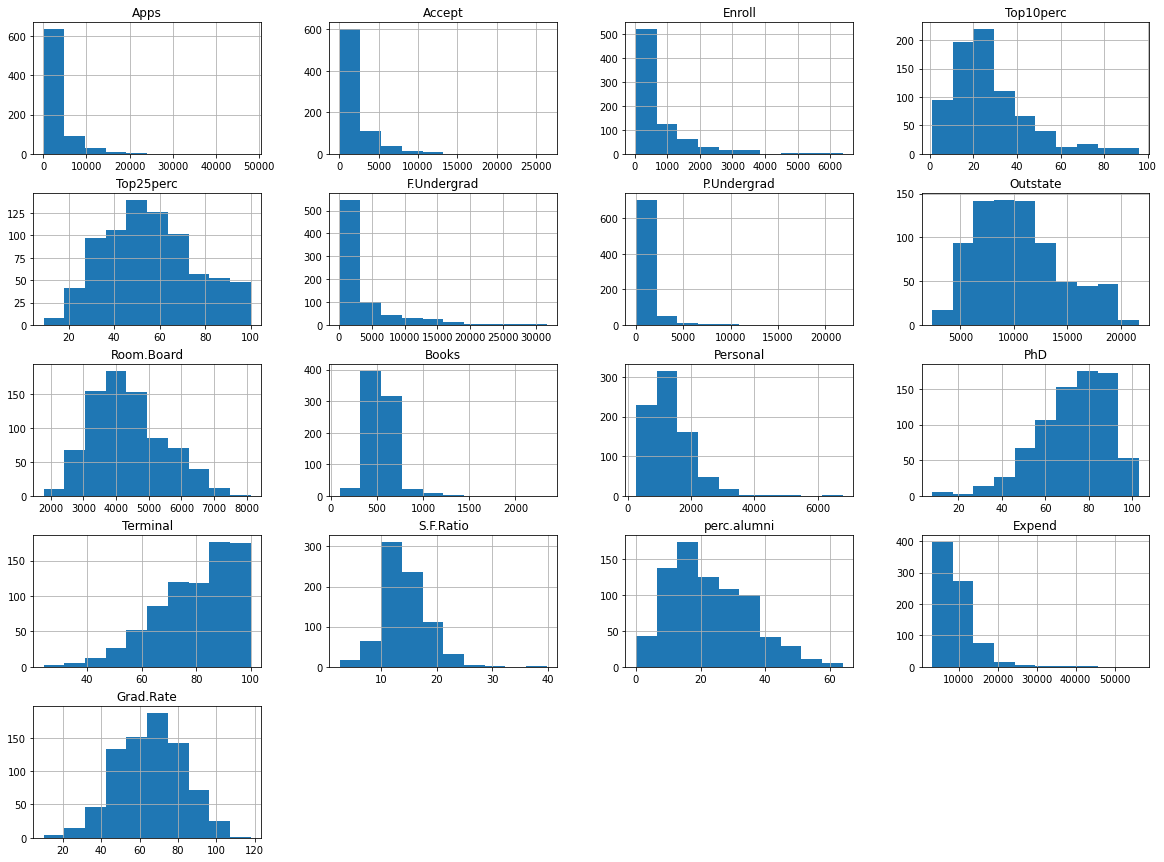

In [8]:
df.hist(figsize=(20,15));

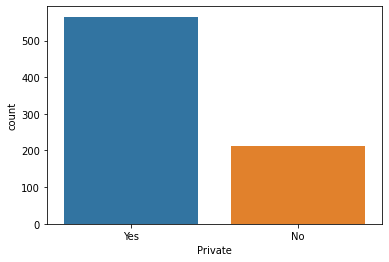

In [10]:
sns.countplot(data=df, x='Private')

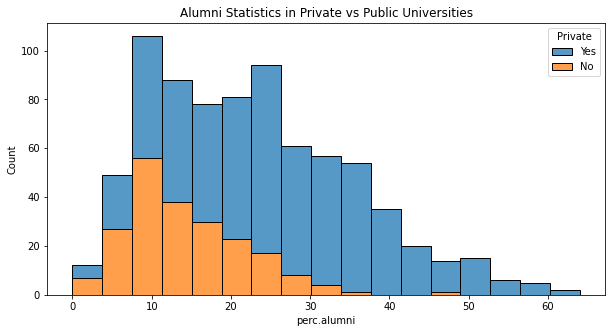

In [14]:
plt.figure(figsize=(10,5))
plt.title('Alumni Statistics in Private vs Public Universities')
sns.histplot(data=df, x="perc.alumni", hue="Private", multiple="stack")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


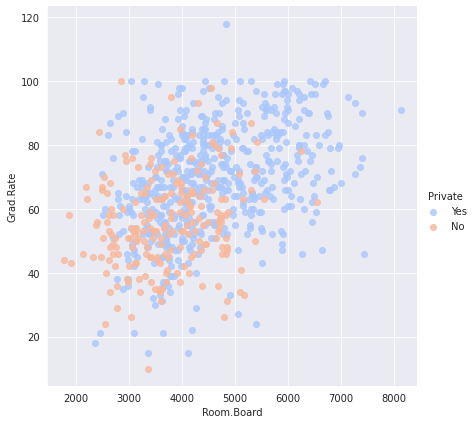

In [18]:
sns.set_style('darkgrid')
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


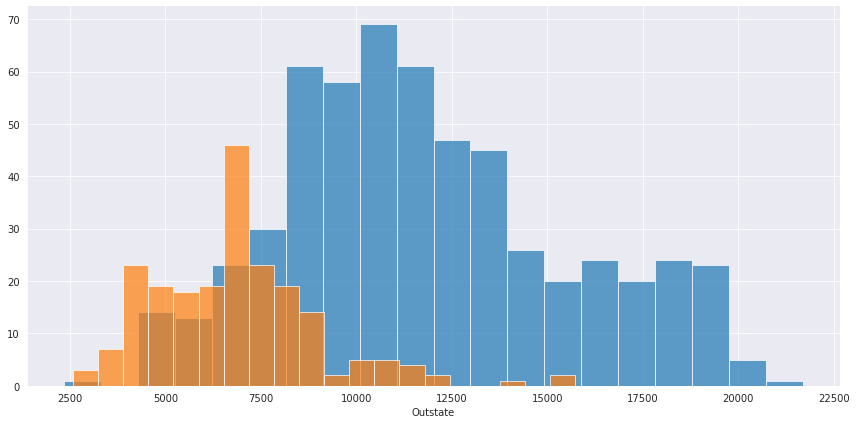

In [19]:
sns.set_style('darkgrid')
sns.color_palette("magma", as_cmap=True)
g = sns.FacetGrid(df,hue="Private",size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

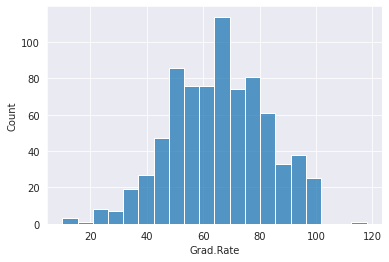

In [21]:
sns.histplot(data=df, x="Grad.Rate")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


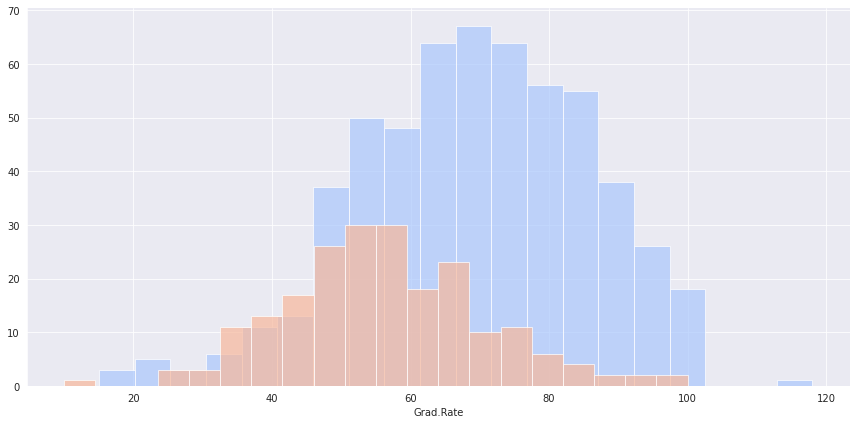

In [23]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

# K Means

In [37]:
# A coluna com o nome da Universidade não será útil para a modelagem com k-means.
X = df.drop(columns=['Name'])
X.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [38]:
# Transformando as variáveis categóricas
X = pd.get_dummies(X,'Private',drop_first=True)
X.head(3)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1


In [39]:
# As colunas 'PhD' e 'Grad.Rate' são porcentagens, mas existem valores fora do range entre 0 e 100. Avalie o que fazer com esses casos.
X[X['PhD']>100]


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
582,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43,0


In [40]:
X.loc[X['PhD']>100, 'PhD'] = 100

In [41]:
X[X['Grad.Rate'] > 100]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
95,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,1


In [42]:
X.loc[df['Grad.Rate'] > 100,'Grad.Rate'] = 100

In [43]:
# Definir o valor de K com o auxílio do método Elbow

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


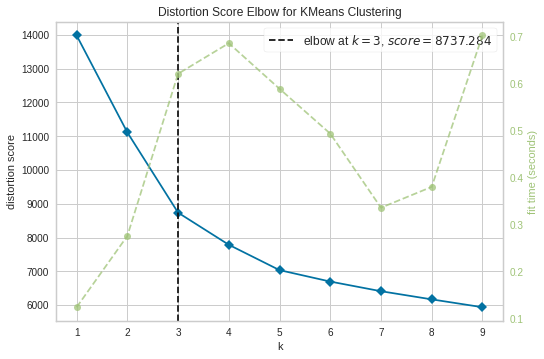

In [44]:
std = StandardScaler() #Instanciar o StandardScaler
X_std = std.fit_transform(X) #Treinar e transformar os dados

model = KMeans() # Intanciar o modelo
visualizer = KElbowVisualizer(model, k=(1,10)) #Intanciar o visualizer

visualizer.fit(X_std)        #Ajustar os dados no visualizer
visualizer.show()        # Apresentar o gráfico


In [45]:
# Após a definição do valor de K, utilizar esse valor para o modelo

model = KMeans(n_clusters=3, random_state=42) #Instanciar o modelo
model.fit(X_std) #Ajustar o modelo
clusters = model.predict(X_std) #Associar cada amostra a um cluster

In [46]:
df['Group'] = clusters #Inserir uma coluna com a definição dos clusters
df[['Name','Group']] #Apresentar o nome da universidade e o cluster que ela foi inserida

,Name,Group
0,Abilene Christian University,1
1,Adelphi University,1
2,Adrian College,1
3,Agnes Scott College,2
4,Alaska Pacific University,1
...,...,...
772,Worcester State College,1
773,Xavier University,1
774,Xavier University of Louisiana,1
775,Yale University,2
